In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.svm import SVC,LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV




In [2]:
#reading the file
rain=pd.read_csv('https://raw.githubusercontent.com/tjkyner/australian-rain-prediction/main/weatherAUS.csv')

In [3]:
rain

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


The Dataset contains about 10 years of daily weather observations of different locations in Australia.
Rain Dataset is to predict whether or not it will rain tomorrow.Here we need to predict two things
1. whether or not it will rain tomorrow.
2. predict how much rainfall could be there.

In [4]:
rain.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


first five rows and columns of the dataset.

In [5]:
rain.shape

(145460, 23)

Here we can see the total count of rows and columns present in the given dataset.
Total numbers of rows are 145460 and 23 columns.

In [6]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Here we get the information of the dtype in the dataset, the presence of null values, memory usages.
There are 16 float, 7 object dtype.
And we can see the that there are some missing values in some of the columns.

In [7]:
rain['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

value count of yes and no rain fall in raintoday columns.

In [8]:
rain.columns.tolist()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

Name of all the columns present in the given dataset.

In [9]:
rain.nunique().to_frame('No of unique values')

,No of unique values
Date,3436
Location,49
MinTemp,389
MaxTemp,505
Rainfall,681
Evaporation,358
Sunshine,145
WindGustDir,16
WindGustSpeed,67
WindDir9am,16


This are the unique values of all the columns.

In [10]:
rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Now that we have got a glimpse of the dataset, we know that it contains null values and all the attributes are numerical. 
Please note there is no order among the classes.
The mean value is greater than median(50%) in most of the columns, which means data is skewed to the right.
There is difference between the max and 75% so there are outliers present in the data. 
The standard deviation,25% percentile value and min can be notice by this describe method.

In [11]:
#checking for null values
rain.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

We can see that except date and location column, rest of the columns have missing values.

In [12]:
#dropping the missing values
rain=rain.dropna()

<Axes: >

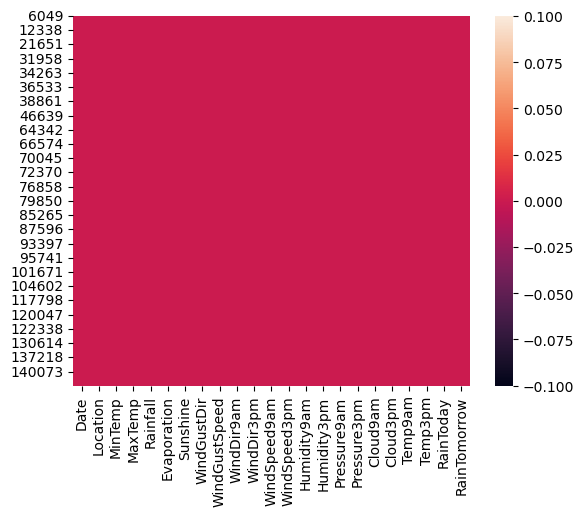

In [13]:
sns.heatmap(rain.isnull())

Checking the presence of null values through heatmap after dropping the null values.
it is bright red in colour that means there is no null values in the dataset

<Axes: >

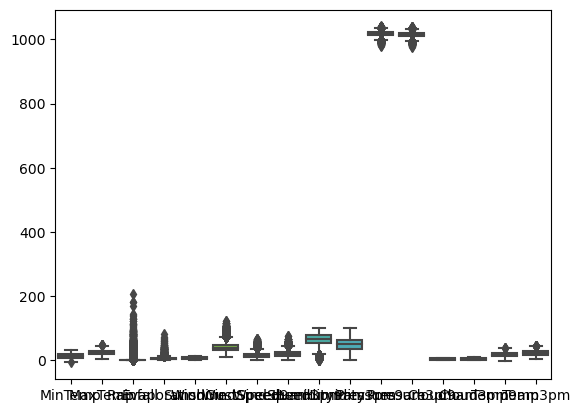

In [14]:
#dropping of duplicates values
rain.drop_duplicates(inplace=True)
sns.boxplot(rain)

In [15]:
rain.duplicated().sum()

0

We can see that there are no duplicate values.

In [16]:
#converting categorical data into numerical data
enc=OrdinalEncoder()
rain[['Location','WindDir9am','RainToday','RainTomorrow','WindGustDir','WindDir3pm']]=enc.fit_transform(rain[['Location','WindDir9am','RainToday','RainTomorrow','WindGustDir','WindDir3pm']])

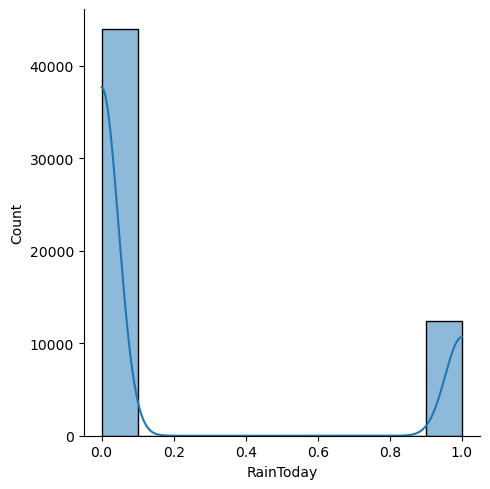

In [17]:
#type of glass
sns.displot(rain['RainToday'],bins=10,kde=True)

rain today count 0 is highest. which means that no rain today is high.

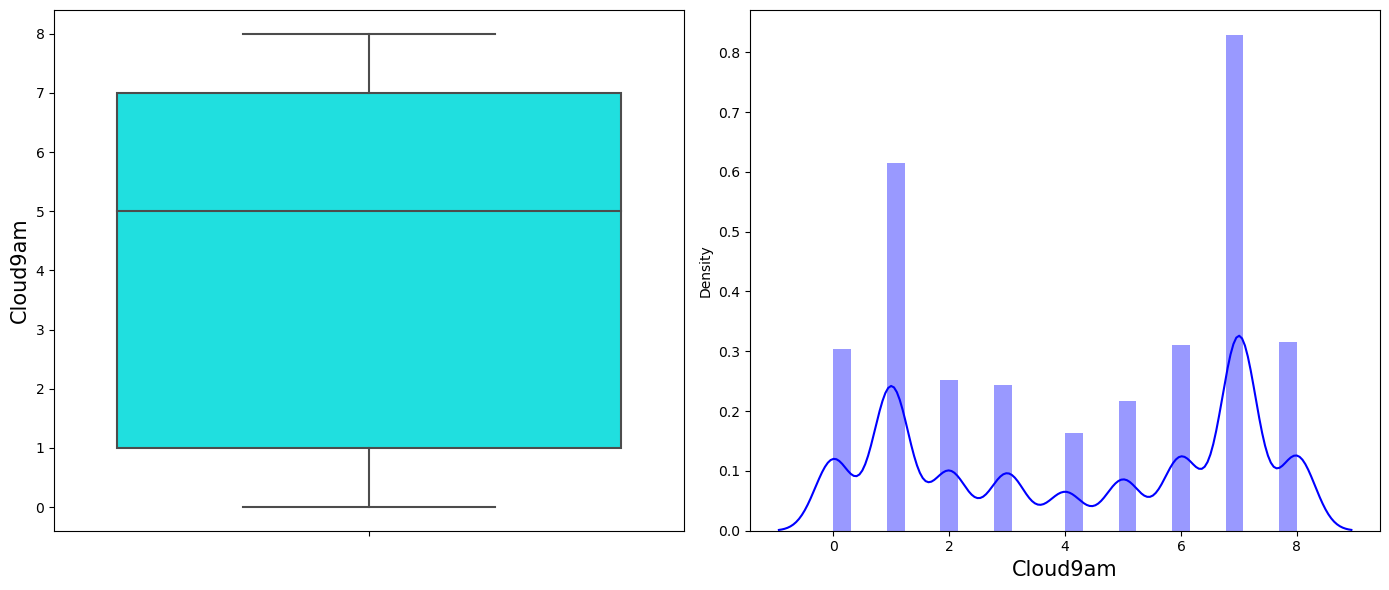

In [18]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='Cloud9am', data=rain,color='cyan')
plt.ylabel('Cloud9am',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(rain['Cloud9am'], color='b')
plt.xlabel('Cloud9am',fontsize=15)
plt.tight_layout()
plt.show()

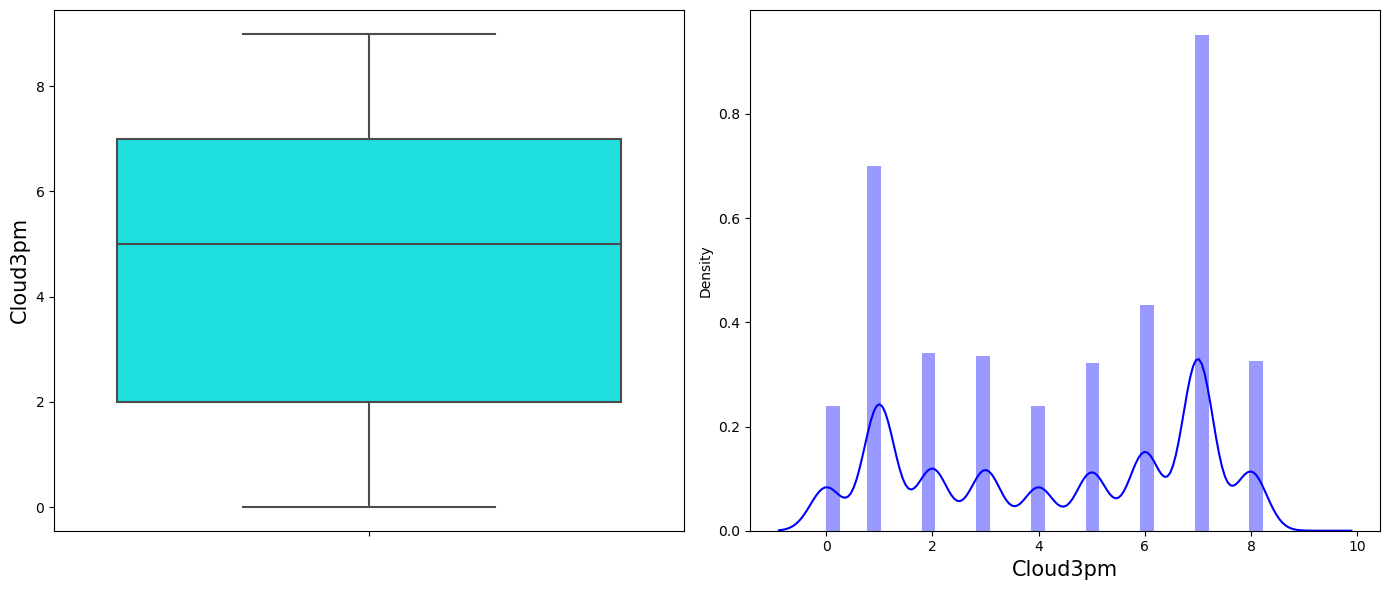

In [19]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='Cloud3pm', data=rain,color='cyan')
plt.ylabel('Cloud3pm',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(rain['Cloud3pm'], color='b')
plt.xlabel('Cloud3pm',fontsize=15)
plt.tight_layout()
plt.show()

Here we can see that there is not much difference between the cloud 9am and cloud of 3pm.

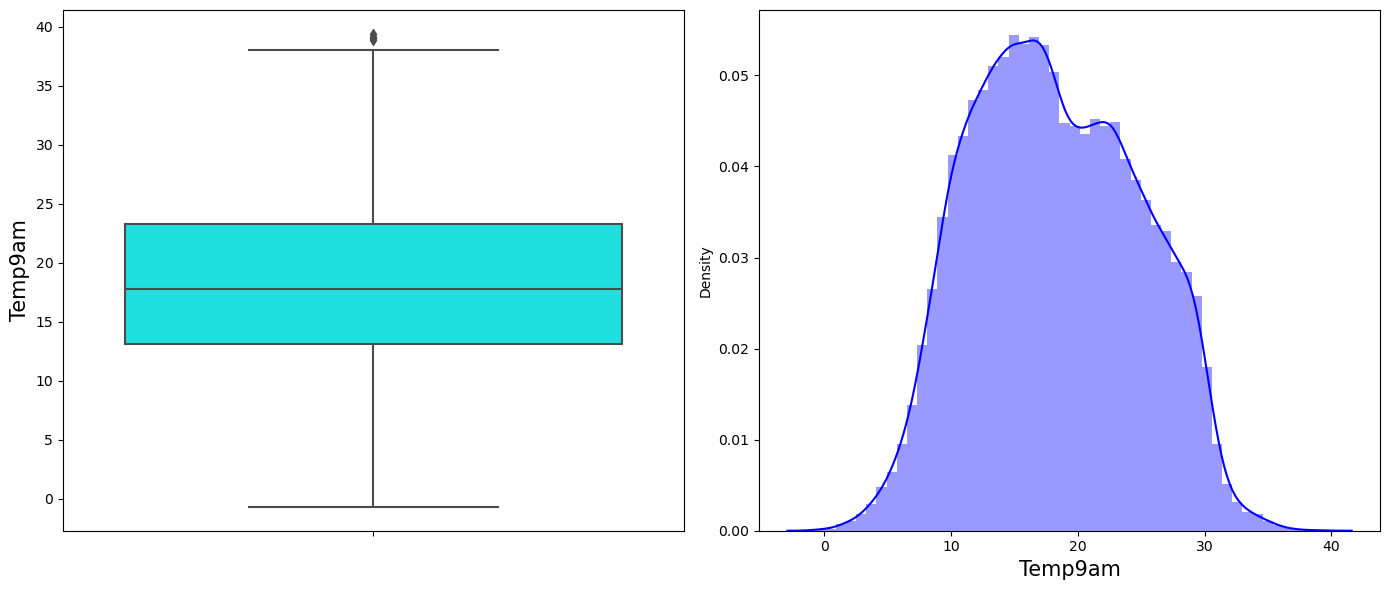

In [20]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='Temp9am', data=rain,color='cyan')
plt.ylabel('Temp9am',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(rain['Temp9am'], color='b')
plt.xlabel('Temp9am',fontsize=15)
plt.tight_layout()
plt.show()

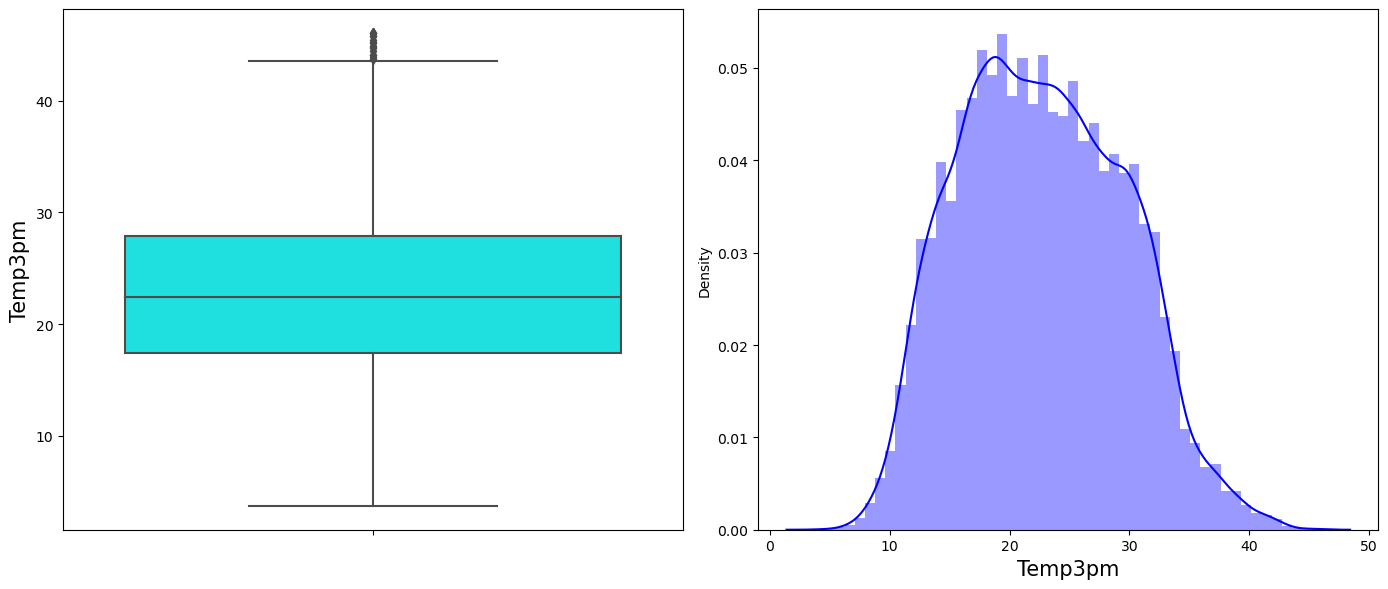

In [21]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='Temp3pm', data=rain,color='cyan')
plt.ylabel('Temp3pm',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(rain['Temp3pm'], color='b')
plt.xlabel('Temp3pm',fontsize=15)
plt.tight_layout()
plt.show()

In the temp 9am and temp 3pm there is very little ups and down with the increase of time.

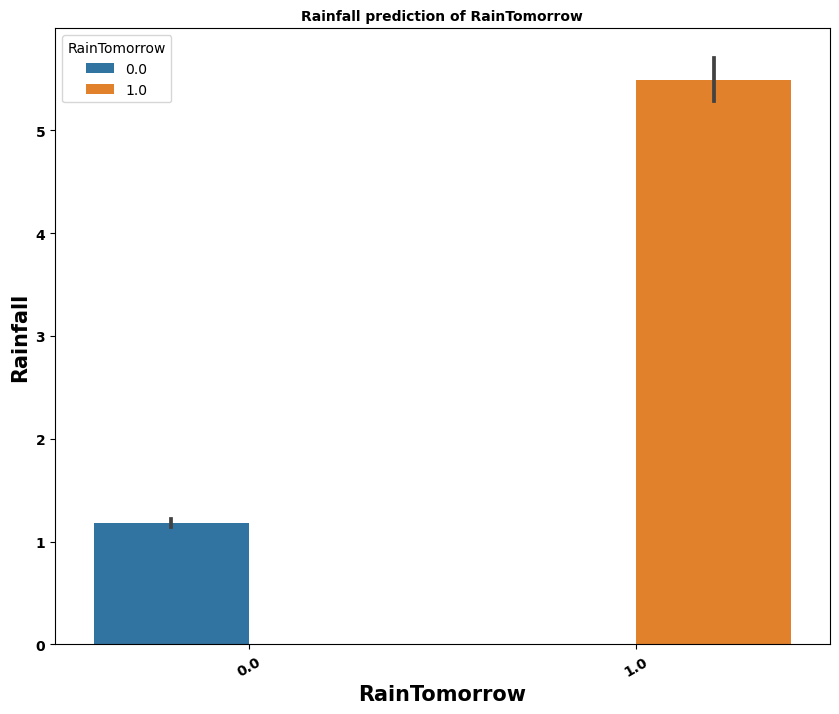

In [22]:
#Lets check the relation between Raintomorreow and  Rainfall
plt.figure(figsize = (10,8))
y = rain["Rainfall"]
p = sns.barplot(x = "RainTomorrow", y = "Rainfall", data = rain,hue= 'RainTomorrow')
plt.title('Rainfall prediction of RainTomorrow', fontsize=10, fontweight='bold')
p.set_xlabel('RainTomorrow',fontsize=15,fontweight ='bold')
p.set_ylabel('Rainfall',fontsize=15,fontweight ='bold')
plt.xticks(fontsize=10,fontweight ='bold',rotation=30)
plt.yticks(fontsize=10,fontweight ='bold')
plt.show()

Here 1 is for yes rainfall tomorrow and 0 is for no rainfall tomorrow.
And we can see that yes rainfall has the highest count.


<Axes: >

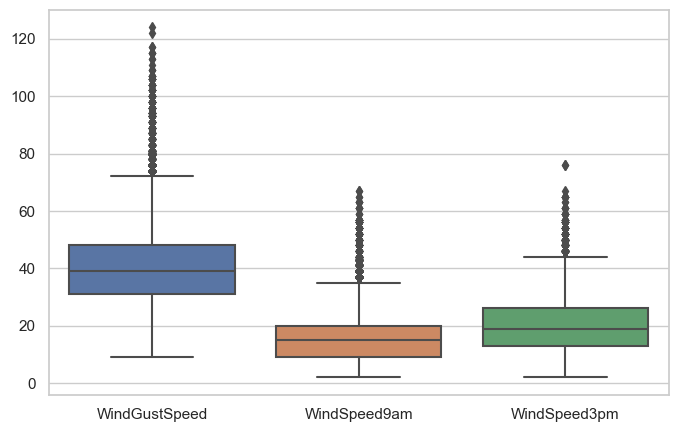

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(data=rain[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']])


<Axes: >

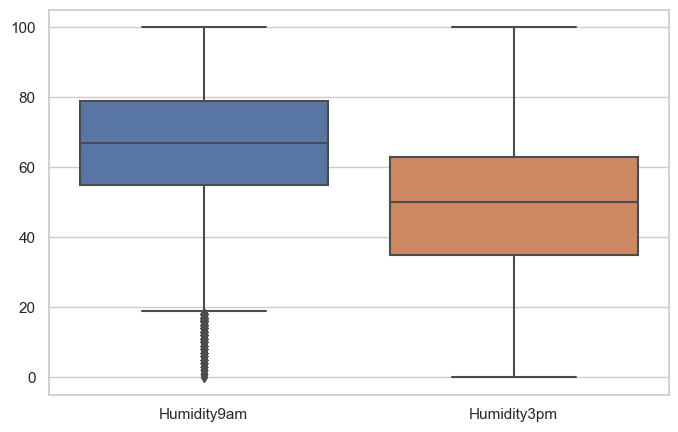

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(data=rain[['Humidity9am','Humidity3pm']])

<Axes: >

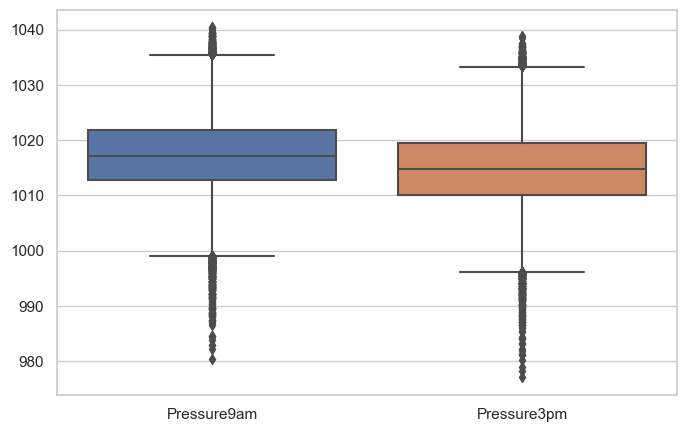

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(data=rain[['Pressure9am','Pressure3pm']])

There are outliers present in the data.

In [26]:
#checking the correlation
rain.corr

<bound method DataFrame.corr of               Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
6049    2009-01-01       4.0     17.9     35.2       0.0         12.0   
6050    2009-01-02       4.0     18.4     28.9       0.0         14.8   
6052    2009-01-04       4.0     19.4     37.6       0.0         10.8   
6053    2009-01-05       4.0     21.9     38.4       0.0         11.4   
6054    2009-01-06       4.0     24.2     41.0       0.0         11.2   
...            ...       ...      ...      ...       ...          ...   
142298  2017-06-20       6.0     19.3     33.4       0.0          6.0   
142299  2017-06-21       6.0     21.2     32.6       0.0          7.6   
142300  2017-06-22       6.0     20.7     32.8       0.0          5.6   
142301  2017-06-23       6.0     19.5     31.8       0.0          6.2   
142302  2017-06-24       6.0     20.2     31.7       0.0          5.6   

        Sunshine  WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  \
6049        1

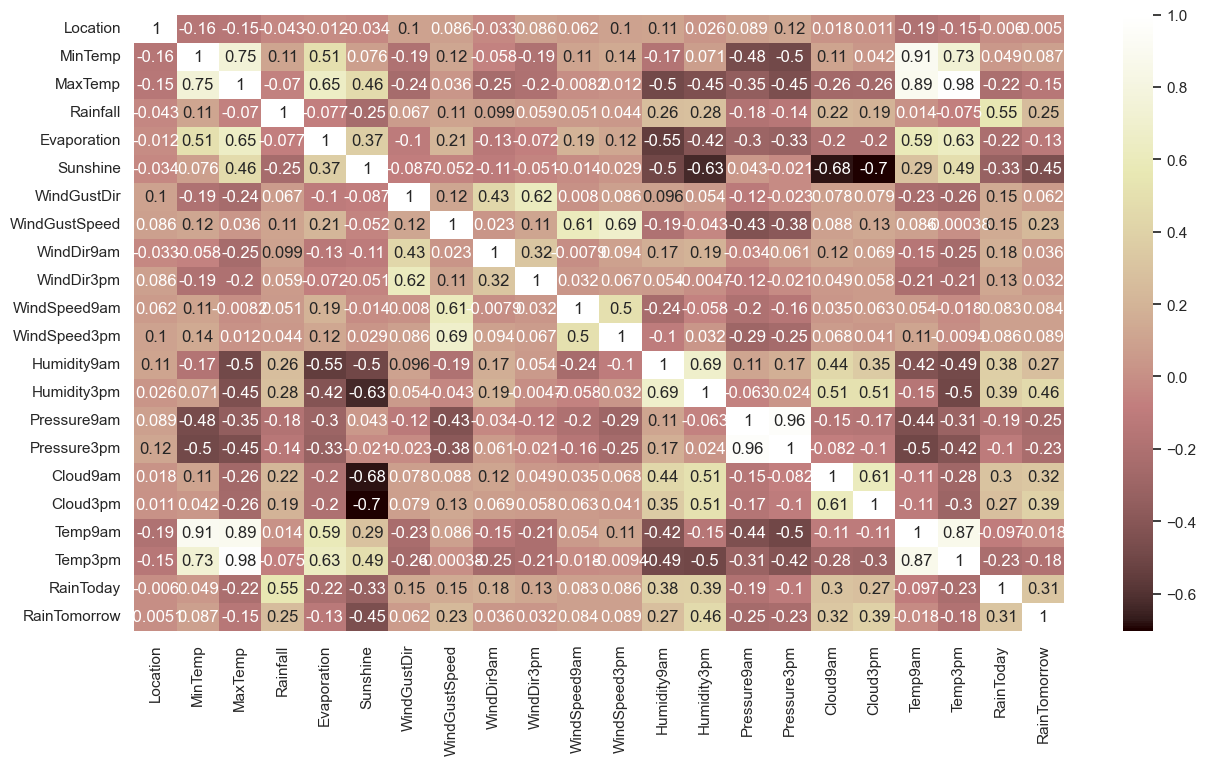

In [27]:
#visualization of correlation
plt.figure(figsize=(15,8))
sns.heatmap(rain.corr(),cmap='pink',annot=True)
plt.show()

#the light shades shows the positive correlation and dark shade shows negative correlation.

 1.Sunshine has strong negative correlation with cloud9am and cloud3pm.
 2. where as 'temp9am' is positively correlated with mintemp and maxtemp.
 3.temp3pm has positive correlation with maxtemp.
 we will drop the date column.

In [28]:
# drop the columns
rain.drop(['Date'],axis=1,inplace=True)
rain.drop(['Sunshine'],axis=1,inplace=True)
rain.drop(['WindGustSpeed'],axis=1,inplace=True)

In [29]:
rain

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindGustDir,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,4.0,17.9,35.2,0.0,12.0,11.0,1.0,12.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0,0.0
6050,4.0,18.4,28.9,0.0,14.8,8.0,10.0,10.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0,0.0
6052,4.0,19.4,37.6,0.0,10.8,5.0,5.0,6.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0,0.0
6053,4.0,21.9,38.4,0.0,11.4,14.0,14.0,15.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0.0,0.0
6054,4.0,24.2,41.0,0.0,11.2,14.0,7.0,14.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,6.0,19.3,33.4,0.0,6.0,1.0,9.0,4.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0.0,0.0
142299,6.0,21.2,32.6,0.0,7.6,0.0,9.0,9.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0.0,0.0
142300,6.0,20.7,32.8,0.0,5.6,0.0,0.0,13.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0.0,0.0
142301,6.0,19.5,31.8,0.0,6.2,2.0,9.0,6.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0.0,0.0


Location           Axes(0.125,0.798085;0.227941x0.0819149)
MinTemp         Axes(0.398529,0.798085;0.227941x0.0819149)
MaxTemp         Axes(0.672059,0.798085;0.227941x0.0819149)
Rainfall           Axes(0.125,0.699787;0.227941x0.0819149)
Evaporation     Axes(0.398529,0.699787;0.227941x0.0819149)
WindGustDir     Axes(0.672059,0.699787;0.227941x0.0819149)
WindDir9am         Axes(0.125,0.601489;0.227941x0.0819149)
WindDir3pm      Axes(0.398529,0.601489;0.227941x0.0819149)
WindSpeed9am    Axes(0.672059,0.601489;0.227941x0.0819149)
WindSpeed3pm       Axes(0.125,0.503191;0.227941x0.0819149)
Humidity9am     Axes(0.398529,0.503191;0.227941x0.0819149)
Humidity3pm     Axes(0.672059,0.503191;0.227941x0.0819149)
Pressure9am        Axes(0.125,0.404894;0.227941x0.0819149)
Pressure3pm     Axes(0.398529,0.404894;0.227941x0.0819149)
Cloud9am        Axes(0.672059,0.404894;0.227941x0.0819149)
Cloud3pm           Axes(0.125,0.306596;0.227941x0.0819149)
Temp9am         Axes(0.398529,0.306596;0.227941x0.081914

<Figure size 1500x2000 with 0 Axes>

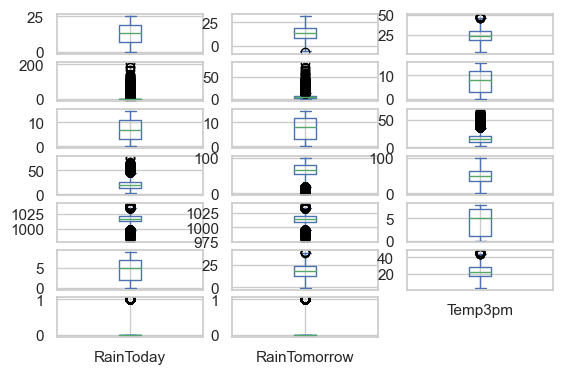

In [30]:
#checking for outliers
fig=plt.figure(figsize=(15,20))
rain.plot(kind='box',subplots=True,layout=(8,3))

In [31]:
#checking skewness
rain.skew()

Location       -0.088320
MinTemp         0.052469
MaxTemp         0.185014
Rainfall        7.502521
Evaporation     2.232267
WindGustDir    -0.057931
WindDir9am      0.071683
WindDir3pm     -0.058736
WindSpeed9am    0.933070
WindSpeed3pm    0.596814
Humidity9am    -0.489376
Humidity3pm     0.005988
Pressure9am    -0.064353
Pressure3pm    -0.000580
Cloud9am       -0.160677
Cloud3pm       -0.191081
Temp9am         0.111134
Temp3pm         0.195421
RainToday       1.345718
RainTomorrow    1.350070
dtype: float64

In [32]:
x=rain.iloc[:,:-1]
y=rain.iloc[:,-1]

In [33]:
#seperating independent and target variables
x=rain.drop('RainTomorrow',axis=1)
y=rain['RainTomorrow']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (56420, 19)
label dimension (56420,)


In [34]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-1.18184371,  0.69120848,  1.57529783, ...,  1.27818584,
         1.56362087, -0.53244519],
       [-1.18184371,  0.76913098,  0.67150378, ...,  0.31897996,
         0.62746694, -0.53244519],
       [-1.18184371,  0.92497598,  1.91960032, ...,  1.59792114,
         1.78303195, -0.53244519],
       ...,
       [-0.90791487,  1.12757448,  1.23099533, ...,  1.00412702,
         1.37346461, -0.53244519],
       [-0.90791487,  0.94056048,  1.08753596, ...,  1.00412702,
         0.94926986, -0.53244519],
       [-0.90791487,  1.04965198,  1.07319002, ...,  1.09547996,
         1.21256315, -0.53244519]])

# BUILDING MODEL

In [35]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pre=lg.predict(x_test)
    acc=accuracy_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)        
    

Best accuracy 0.8515892709441096 at random state 168


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [37]:
#DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))


0.7884910788136594
[[11327  1953]
 [ 1627  2019]]
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     13280
         1.0       0.51      0.55      0.53      3646

    accuracy                           0.79     16926
   macro avg       0.69      0.70      0.70     16926
weighted avg       0.80      0.79      0.79     16926



accuracy score of decision tree is 78.97%

In [38]:
# Random forest classifier
Rc=RandomForestClassifier()
Rc.fit(x_train,y_train)
preRc=Rc.predict(x_test)
print(accuracy_score(y_test,preRc))
print(confusion_matrix(y_test,preRc))
print(classification_report(y_test,preRc))

0.8615739099610067
[[12639   641]
 [ 1702  1944]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92     13280
         1.0       0.75      0.53      0.62      3646

    accuracy                           0.86     16926
   macro avg       0.82      0.74      0.77     16926
weighted avg       0.85      0.86      0.85     16926



accuracy score of random forest is 86.08%

In [39]:
# Logistic regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
prelg=lg.predict(x_test)
print(accuracy_score(y_test,prelg))
print(confusion_matrix(y_test,prelg))
print(classification_report(y_test,prelg))

0.8515892709441096
[[12533   747]
 [ 1765  1881]]
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     13280
         1.0       0.72      0.52      0.60      3646

    accuracy                           0.85     16926
   macro avg       0.80      0.73      0.75     16926
weighted avg       0.84      0.85      0.84     16926



accuracy score of logistic regression is 85.15%

In [40]:
#Support vector machine
svc=SVC()
svc.fit(x_train,y_train)
presvc=svc.predict(x_test)
print(accuracy_score(y_test,presvc))
print(confusion_matrix(y_test,presvc))
print(classification_report(y_test,presvc))

0.8566702115089212
[[12707   573]
 [ 1853  1793]]
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     13280
         1.0       0.76      0.49      0.60      3646

    accuracy                           0.86     16926
   macro avg       0.82      0.72      0.75     16926
weighted avg       0.85      0.86      0.84     16926



accyracy score of svc is 85.66%

In [41]:
# Extra tree classifier
ex=ExtraTreesClassifier()
ex.fit(x_train,y_train)
preada=ex.predict(x_test)
print(accuracy_score(y_test,preada))
print(confusion_matrix(y_test,preada))
print(classification_report(y_test,preada))

0.8610421836228288
[[12674   606]
 [ 1746  1900]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92     13280
         1.0       0.76      0.52      0.62      3646

    accuracy                           0.86     16926
   macro avg       0.82      0.74      0.77     16926
weighted avg       0.85      0.86      0.85     16926



accuracy score of extra tree is 86.03%

# CHECKING CROSS VALIDATION

In [42]:
# Cv score for decisiontree
score= cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracu score and cross validation',accuracy_score(y_test,preddtc)-score.mean())

[0.75664658 0.75824176 0.67609004 0.78208082 0.78092875]
0.7507975895072668
0.0388776847192808
difference between accuracu score and cross validation 0.0376934893063926


cross validation score of decision tree is 0.7490251683800071

In [43]:
# Cv score for randomforest
score= cross_val_score(Rc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,preRc)-score.mean())

[0.8371145  0.84305211 0.77419355 0.85466147 0.84402694]
0.8306097128677774
0.02876949073247296
difference between accuracy score and corss validation 0.030964197093229284


cross validation score of randomforest is 0.8298475717830558

In [44]:
# Cv score for logistic regression
score= cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and corss validation',accuracy_score(y_test,prelg)-score.mean())

[0.83419    0.83507621 0.83277207 0.8611308  0.84872386]
0.8423785891527829
0.01099609838799931
difference between accuracy score and corss validation 0.00921068179132678


cross validation score of logistic regression is 0.8423785891527829

In [45]:
# Cv score for support vector machine
score= cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,presvc)-score.mean())

[0.83693726 0.84127969 0.8055654  0.85590216 0.84340659]
0.8366182204891881
0.016757452070254666
difference between accuracy score and cross validation 0.020051991019733095


cross validation score of svc is 0.8366182204891881

In [46]:
# Cv score for Extatrees classifier
score= cross_val_score(ex,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())
print('difference between accuracy score and cross validation',accuracy_score(y_test,preada)-score.mean())

[0.83676001 0.84278625 0.79696916 0.85235732 0.84455867]
0.834686281460475
0.01950497710627686
difference between accuracy score and cross validation 0.02635590216235384


cross validation score of extratress is 0.8337114498404821

Logistic Regression is our best model as the difference between accuracy score and cross validation score is least

# SETTING PARAMETERS

In [47]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [48]:
para={'C':[0.8,0.9,1.0],
      'tol':[0.0001],
     'class_weight':[None],
     'max_iter':[100]}
lg_cv=GridSearchCV(svc,para,cv=10)
lg_cv.fit(x_train,y_train)
print(lg_cv.best_params_)

{'C': 0.9, 'class_weight': None, 'max_iter': 100, 'tol': 0.0001}


In [49]:
lg_new=SVC(C=0.9,class_weight=None, max_iter=100,tol=0.0001)
lg_new.fit(x_train,y_train)
y_pred_new=lg_new.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred_new))
print(acc*100)

0.7237386269644334
84.67446531962662


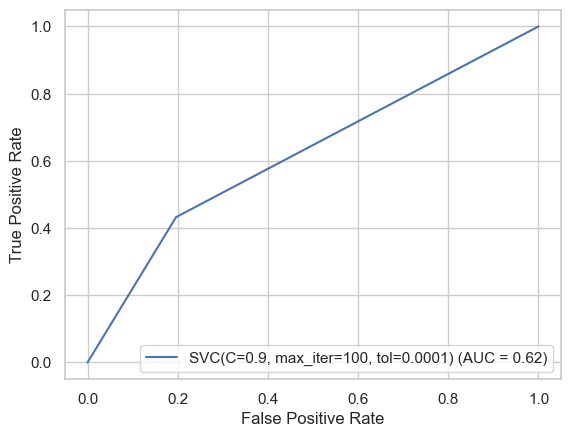

In [50]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_new)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=lg_new)
display.plot()

Here we have plotted the ROC curve for yhe model and the Auc value of the best model is 58%

In [51]:
#Saving the model
import joblib
import pickle
filename="Rainfall tomorrow prediction.pkl"
pickle.dump(lg_new,open(filename,'wb'))

In [52]:
#predicting the save model
model=pickle.load(open('Rainfall tomorrow prediction.pkl','rb'))

In [53]:
result=model.score(x_test,y_test)
print(result*100)

72.37386269644334


In [54]:
con=pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,16916,16917,16918,16919,16920,16921,16922,16923,16924,16925
predicted,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
orginal,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# BUILDING MODEL FOR RAINFALL

In [55]:
#seperating independent and target variables
x=rain.drop('Rainfall',axis=1)
y=rain['Rainfall']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (56420, 19)
label dimension (56420,)


In [56]:
#scaling of data
st=StandardScaler()
x=st.fit_transform(x)
x

array([[-1.18184371,  0.69120848,  1.57529783, ...,  1.56362087,
        -0.53244519, -0.53148543],
       [-1.18184371,  0.76913098,  0.67150378, ...,  0.62746694,
        -0.53244519, -0.53148543],
       [-1.18184371,  0.92497598,  1.91960032, ...,  1.78303195,
        -0.53244519, -0.53148543],
       ...,
       [-0.90791487,  1.12757448,  1.23099533, ...,  1.37346461,
        -0.53244519, -0.53148543],
       [-0.90791487,  0.94056048,  1.08753596, ...,  0.94926986,
        -0.53244519, -0.53148543],
       [-0.90791487,  1.04965198,  1.07319002, ...,  1.21256315,
        -0.53244519, -0.53148543]])

In [57]:
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics

In [58]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pre=lr.predict(x_test)
    acc=r2_score(y_test,pre)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy',maxAccu,'at random state',maxRs)          

Best accuracy 0.35539924618797347 at random state 5


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [60]:
#support vector regression
svr=SVR()
svr.fit(x_train,y_train)
pre=svr.predict(x_test)
pred=svr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.32376347180095433
36.06868604348373
Mean absolute error: 1.4123579173697074
Mean square error: 25.769525281946063
Root mean square error: 5.076369301178359


In [61]:
#Randomforest
ra=RandomForestRegressor()
ra.fit(x_train,y_train)
pre=ra.predict(x_test)
pred=ra.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.9210912914320285
45.546963037742
Mean absolute error: 1.5644923195084484
Mean square error: 21.94900786228288
Root mean square error: 4.684976826226879


In [62]:
#KNN
knn=KNN()
knn.fit(x_train,y_train)
pre=knn.predict(x_test)
pred=knn.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.5607697613137163
37.10787192536097
Mean absolute error: 1.5874276261373035
Mean square error: 25.350648753397138
Root mean square error: 5.034942775583168


In [63]:
#Extratrees regressor
ex=ExtraTreesRegressor()
ex.fit(x_train,y_train)
pre=ex.predict(x_test)
pred=ex.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

1.0
46.314322429640356
Mean absolute error: 1.5469571074087207
Mean square error: 21.639699543306154
Root mean square error: 4.651849045627572


In [64]:
#Linear regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pre=lr.predict(x_test)
pred=lr.predict(x_train)
print(r2_score(y_train,pred))
print(r2_score(y_test,pre)*100)
print('Mean absolute error:',mean_absolute_error(y_test,pre))
print('Mean square error:',mean_squared_error(y_test,pre))
print('Root mean square error:',np.sqrt(mean_squared_error(y_test,pre)))

0.32048160088384314
35.53992461879735
Mean absolute error: 2.288312183874061
Mean square error: 25.982659191736207
Root mean square error: 5.097318823826523


# CHECKING CROSS VALIDATION

In [65]:
# Cv score for support vector
score= cross_val_score(svr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.26528867 0.35570692 0.2381133  0.40091368 0.33994951]
0.3199944162896248
difference between R2score and cross validation 3.54048298983487


In [66]:
# Cv score for Random forest
score= cross_val_score(ra,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.32244815 0.3728407  0.34609494 0.46266515 0.45586714]
0.39198321741668185
difference between R2score and cross validation -3.658397122870838


In [67]:
# Cv score for KNN
score= cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.27228001 0.28218059 0.29058784 0.35885908 0.35415616]
0.31161273800163247
difference between R2score and cross validation 4.3786508186340996


In [68]:
# Cv score for Extatrees regressor
score= cross_val_score(ex,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.35155405 0.38088441 0.37805954 0.4681382  0.50919579]
0.41756639636386
difference between R2score and cross validation -6.216715017588653


In [69]:
# Cv score for Linear regression
score= cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print('difference between R2score and cross validation',(r2_score(y_test,pre)-score.mean())*100)

[0.35185101 0.33453014 0.2486838  0.34554883 0.37208521]
0.3305397975795658
difference between R2score and cross validation 2.4859448608407666


Extratrees regressor is our best model as the R2score and cross validation is least.

# SETTING PARAMETERS

In [70]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [71]:
para={'n_estimators':[50,100],
      'criterion':['squared_error','poisson'],
     'n_jobs':['int',None],
     'ccp_alpha':[0.0]}
ex_cv=GridSearchCV(ex,para,cv=5)
ex_cv.fit(x_train,y_train)
print(ex_cv.best_params_)

{'ccp_alpha': 0.0, 'criterion': 'poisson', 'n_estimators': 50, 'n_jobs': None}


In [72]:
#checking the new parameters
ex_new=ExtraTreesRegressor(criterion='poisson',ccp_alpha=0.0,n_jobs=None,n_estimators=50)
ex_new.fit(x_train,y_train)
y_pred_new=ex_new.predict(x_test)
print(metrics.r2_score(y_test,y_pred_new))

0.47169288776222096


In [73]:
#checking the new parameters score
ex_new.fit(x_train,y_train)
pre=ex_new.predict(x_test)
print('R2 score:',r2_score(y_test,pre))
print('mean absolute error:',mean_absolute_error(y_test,pre))
print('mean square error;',mean_squared_error(y_test,pre))
print('root mean squre error:',np.sqrt(mean_squared_error(y_test,pre)))

R2 score: 0.46643128605478823
mean absolute error: 1.5114256091002514
mean square error; 21.507163880627726
root mean squre error: 4.637581684523489


In [74]:
#importing pickle and storing the file
import joblib
import pickle
filename="Rainfall prediction.pkl"
pickle.dump(ex_new,open(filename,'wb'))

In [75]:
load_m=pickle.load(open('Rainfall prediction.pkl','rb'))

In [76]:
#checking the result
result=load_m.score(x_test,y_test)
print(result*100)

46.64312860547882


In [77]:
con=pd.DataFrame([load_m.predict(x_test)[:],y_test[:]],index=['predicted','orginal'])
con

,0,1,2,3,4,5,6,7,8,9,...,16916,16917,16918,16919,16920,16921,16922,16923,16924,16925
predicted,0.01002,0.075712,0.145355,0.330637,0.009742,0.041184,0.088314,7.02,0.040914,0.133363,...,0.027435,11.584,0.03076,0.078185,4.836,0.001514,5.766,0.083399,8.312,0.004613
orginal,0.00000,0.000000,0.400000,1.000000,0.000000,0.000000,0.000000,10.40,0.000000,0.000000,...,0.000000,14.600,0.20000,0.000000,1.800,0.000000,3.200,0.000000,4.800,0.000000
